In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dictionary to abbreviate states
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}


df = pd.read_excel(r'C:\Users\15039\OneDrive\Documents\Data Science Project\StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [6]:
#dropping Yeezy brand
df.drop(df[df['Brand']!='Off-White'].index, inplace=True)

#abbreviating states
df.replace({"Buyer Region": us_state_to_abbrev}, inplace=True)

#organize column name 
df.drop(columns=['Order Date'])
df=df.reset_index()
df=df.drop(columns=['index'])

#taking out the - in sneaker name
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-07,Off-White,Nike Air Max 90 Off White,1600.0,160,2017-09-09,8.0,CA
1,2017-09-07,Off-White,Nike Air Max 90 Off White,1090.0,160,2017-09-09,11.5,NY
2,2017-09-07,Off-White,Nike Air Presto Off White,1344.0,160,2017-09-09,10.0,NY
3,2017-09-07,Off-White,Nike Air Presto Off White,1325.0,160,2017-09-09,10.0,MA
4,2017-09-07,Off-White,Nike Air VaporMax Off White,1800.0,250,2017-09-09,12.0,KY


In [7]:
#creating column: bought less than retail
df['Bought for Less Than Retail'] = df['Sale Price'] < df['Retail Price']
df.head()

#creating column: bought for retail 
df['Bought for Retail'] = df['Sale Price'] == df['Retail Price']
df.head()

#creating column: bought for more than retail
df['Bought for More Than Retail'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail,Bought for Retail,Bought for More Than Retail
0,2017-09-07,Off-White,Nike Air Max 90 Off White,1600.0,160,2017-09-09,8.0,CA,False,False,True
1,2017-09-07,Off-White,Nike Air Max 90 Off White,1090.0,160,2017-09-09,11.5,NY,False,False,True
2,2017-09-07,Off-White,Nike Air Presto Off White,1344.0,160,2017-09-09,10.0,NY,False,False,True
3,2017-09-07,Off-White,Nike Air Presto Off White,1325.0,160,2017-09-09,10.0,MA,False,False,True
4,2017-09-07,Off-White,Nike Air VaporMax Off White,1800.0,250,2017-09-09,12.0,KY,False,False,True


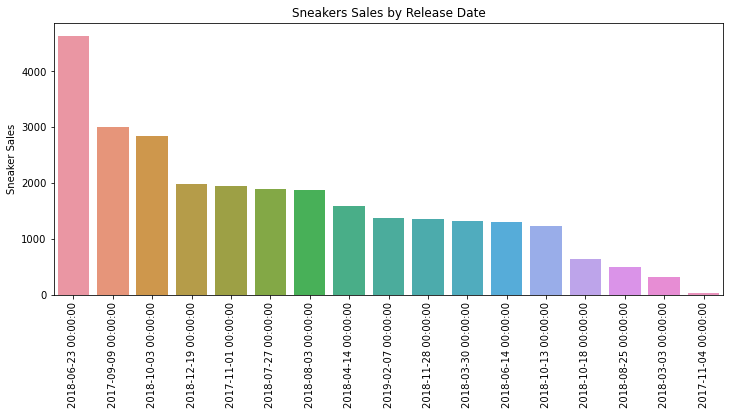

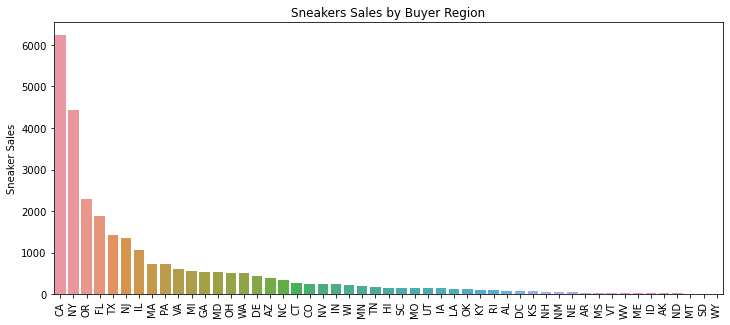

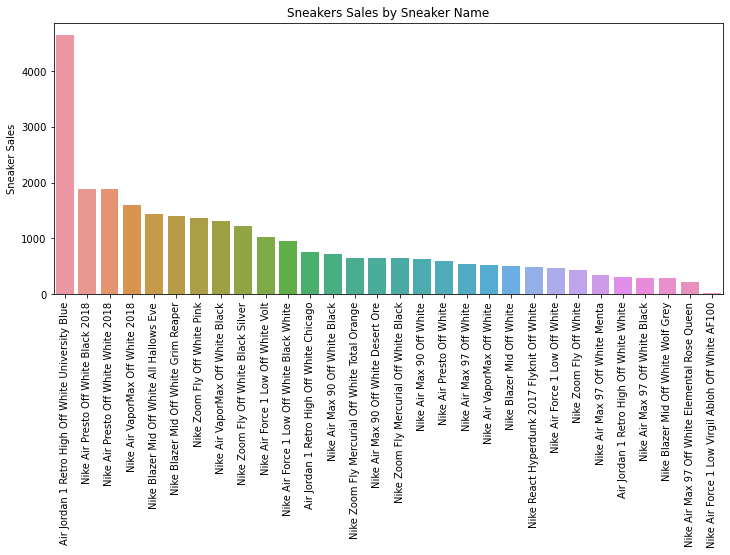

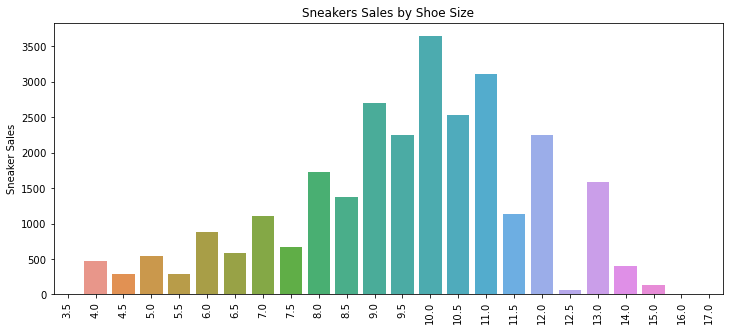

In [8]:
#bar graphs for sneaker sales
df_cat = ['Release Date', 'Buyer Region', 'Sneaker Name', 'Shoe Size']
for cat in df_cat:
    cat_num = df[str(cat)].value_counts()
    plt.figure(figsize=(12,5))
    chart = sns.barplot(x = cat_num.index, y= cat_num)
    chart.set_title("Sneakers Sales by %s" % (cat))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show()

In [9]:
#grouping to find average sale of each shoe size
df_groups1=df.groupby('Shoe Size').mean('Sale Price')
df_groups1.rename(columns={'Sale Price':'Avg Sale Price'}, inplace=True)
df_groups1.drop(['Bought for Less Than Retail', 'Bought for Retail', 'Bought for More Than Retail'], axis=1, inplace=True)
df_groups1

,Avg Sale Price,Retail Price
Shoe Size,,
3.5,555.333333,250.000000
4.0,588.870357,181.380042
4.5,591.225825,174.375000
5.0,618.338235,180.220588
5.5,588.031359,184.703833
6.0,607.579333,178.720272
6.5,588.384160,183.242784
7.0,621.099820,177.028725
7.5,670.666168,180.868263


<AxesSubplot:title={'center':'Average Sales Price of Each Shoe Size'}, xlabel='Shoe Size', ylabel='Avg Sales Price'>

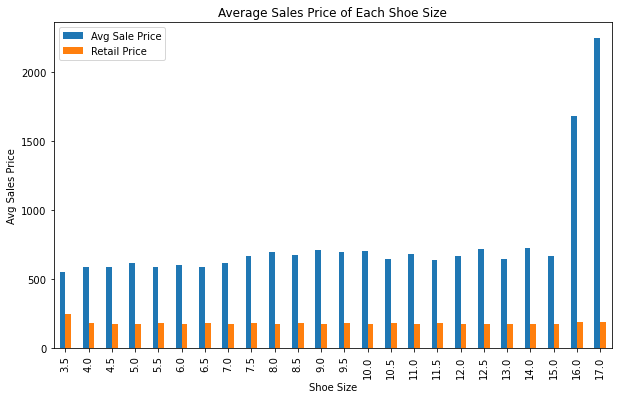

In [10]:
#graphing the average sale of each shoe size
df_groups1.plot(kind='bar', 
               title='Average Sales Price of Each Shoe Size', 
               xlabel='Shoe Size', ylabel='Avg Sales Price', 
               figsize=(10,6))

In [11]:
#top 5 shoe sizes with the highest average sale price
df_groups1['Avg Sale Price'].nlargest(n=5)

Shoe Size
17.0    2250.000000
16.0    1682.750000
14.0     728.951633
12.5     716.553846
9.0      710.430536
Name: Avg Sale Price, dtype: float64

In [12]:
#grouping to find average sale of each sneaker
df_groups2=df.groupby('Sneaker Name').mean('Sale Price')
df_groups2.rename(columns={'Sale Price':'Avg Sale Price'}, inplace=True)
df_groups2.drop(['Bought for Less Than Retail', 
                 'Bought for Retail', 
                 'Bought for More Than Retail','Shoe Size'], 
axis=1, inplace=True)
df_groups2

,Avg Sale Price,Retail Price
Sneaker Name,,
Air Jordan 1 Retro High Off White Chicago,1769.800000,190.0
Air Jordan 1 Retro High Off White University Blue,850.853503,190.0
Air Jordan 1 Retro High Off White White,1826.068894,190.0
Nike Air Force 1 Low Off White,717.462185,170.0
Nike Air Force 1 Low Off White Black White,512.126152,170.0
Nike Air Force 1 Low Off White Volt,391.236868,170.0
Nike Air Force 1 Low Virgil Abloh Off White AF100,975.516129,150.0
Nike Air Max 90 Off White,709.923445,160.0
Nike Air Max 90 Off White Black,552.785469,160.0


<AxesSubplot:title={'center':'Average Sales Price of Sneaker'}, xlabel='Sneaker', ylabel='Avg Sales Price'>

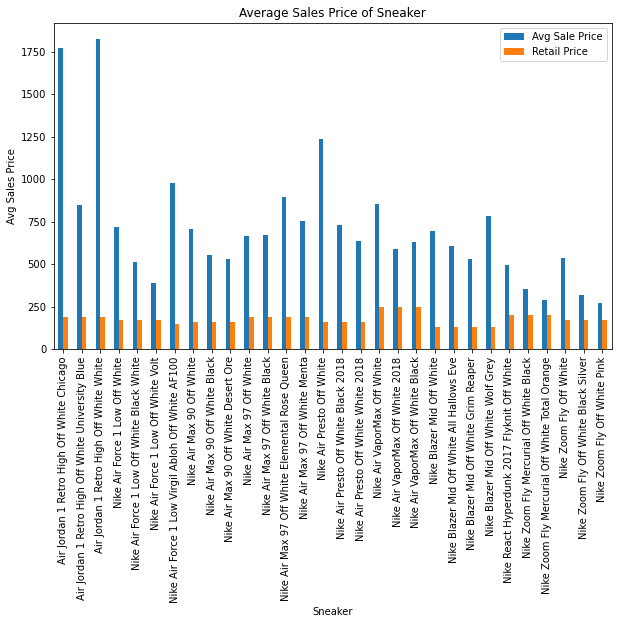

In [13]:
#graphing the average sale of each sneaker
df_groups2.plot(kind='bar', 
               title='Average Sales Price of Sneaker', 
               xlabel='Sneaker', ylabel='Avg Sales Price', 
               figsize=(10,6))

In [14]:
#top 5 shoe sizes with the highest average sale price
df_groups2['Avg Sale Price'].nlargest(n=5)

Sneaker Name
Air Jordan 1 Retro High Off White White              1826.068894
Air Jordan 1 Retro High Off White Chicago            1769.800000
Nike Air Presto Off White                            1236.055369
Nike Air Force 1 Low Virgil Abloh Off White AF100     975.516129
Nike Air Max 97 Off White Elemental Rose Queen        893.782407
Name: Avg Sale Price, dtype: float64